In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./DATA/cluster_mpg.csv')

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [6]:
df_w_dummies = pd.get_dummies(data=df.drop('name',axis=1)).astype(int)

In [7]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18,8,307,130,3504,12,70,0,0,1
1,15,8,350,165,3693,11,70,0,0,1
2,18,8,318,150,3436,11,70,0,0,1
3,16,8,304,150,3433,12,70,0,0,1
4,17,8,302,140,3449,10,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27,4,140,86,2790,15,82,0,0,1
388,44,4,97,52,2130,24,82,1,0,0
389,32,4,135,84,2295,11,82,0,0,1
390,28,4,120,79,2625,18,82,0,0,1


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [11]:
scaled_data

array([[0.24324324, 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.16216216, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.24324324, 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.62162162, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.51351351, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.59459459, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [12]:
scaled_df = pd.DataFrame(scaled_data,columns=df_w_dummies.columns)
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.243243,1.0,0.617571,0.456522,0.536150,0.2500,0.0,0.0,0.0,1.0
1,0.162162,1.0,0.728682,0.646739,0.589736,0.1875,0.0,0.0,0.0,1.0
2,0.243243,1.0,0.645995,0.565217,0.516870,0.1875,0.0,0.0,0.0,1.0
3,0.189189,1.0,0.609819,0.565217,0.516019,0.2500,0.0,0.0,0.0,1.0
4,0.216216,1.0,0.604651,0.510870,0.520556,0.1250,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.486486,0.2,0.186047,0.217391,0.333711,0.4375,1.0,0.0,0.0,1.0
388,0.945946,0.2,0.074935,0.032609,0.146583,1.0000,1.0,1.0,0.0,0.0
389,0.621622,0.2,0.173127,0.206522,0.193365,0.1875,1.0,0.0,0.0,1.0
390,0.513514,0.2,0.134367,0.179348,0.286929,0.6250,1.0,0.0,0.0,1.0


<Axes: >

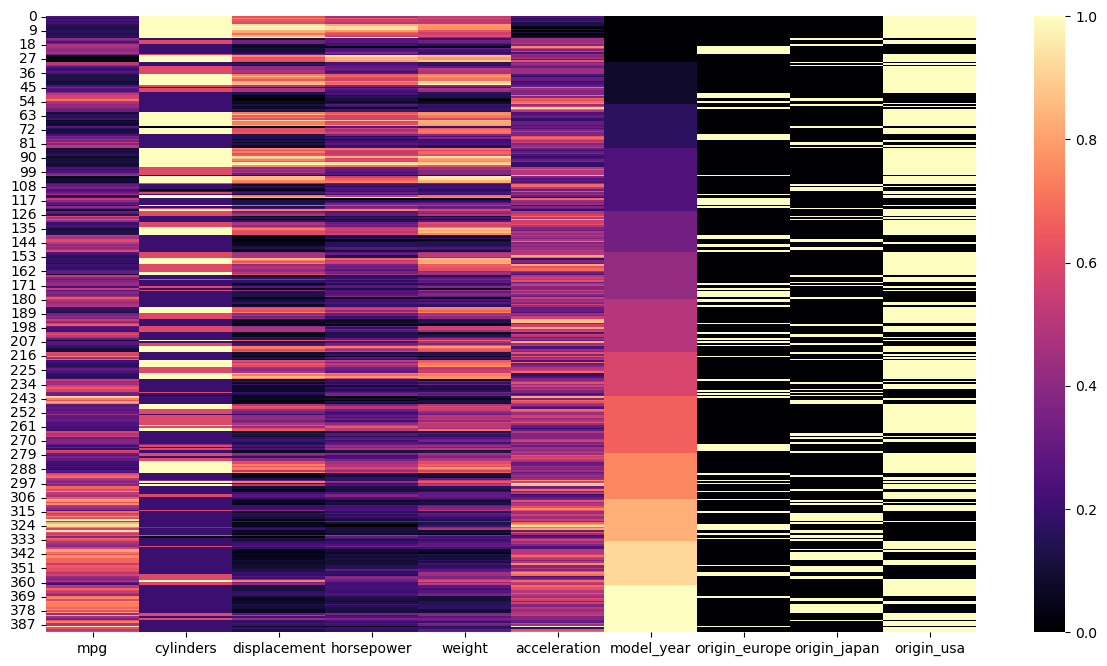

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df,cmap='magma')

<Figure size 1500x800 with 0 Axes>

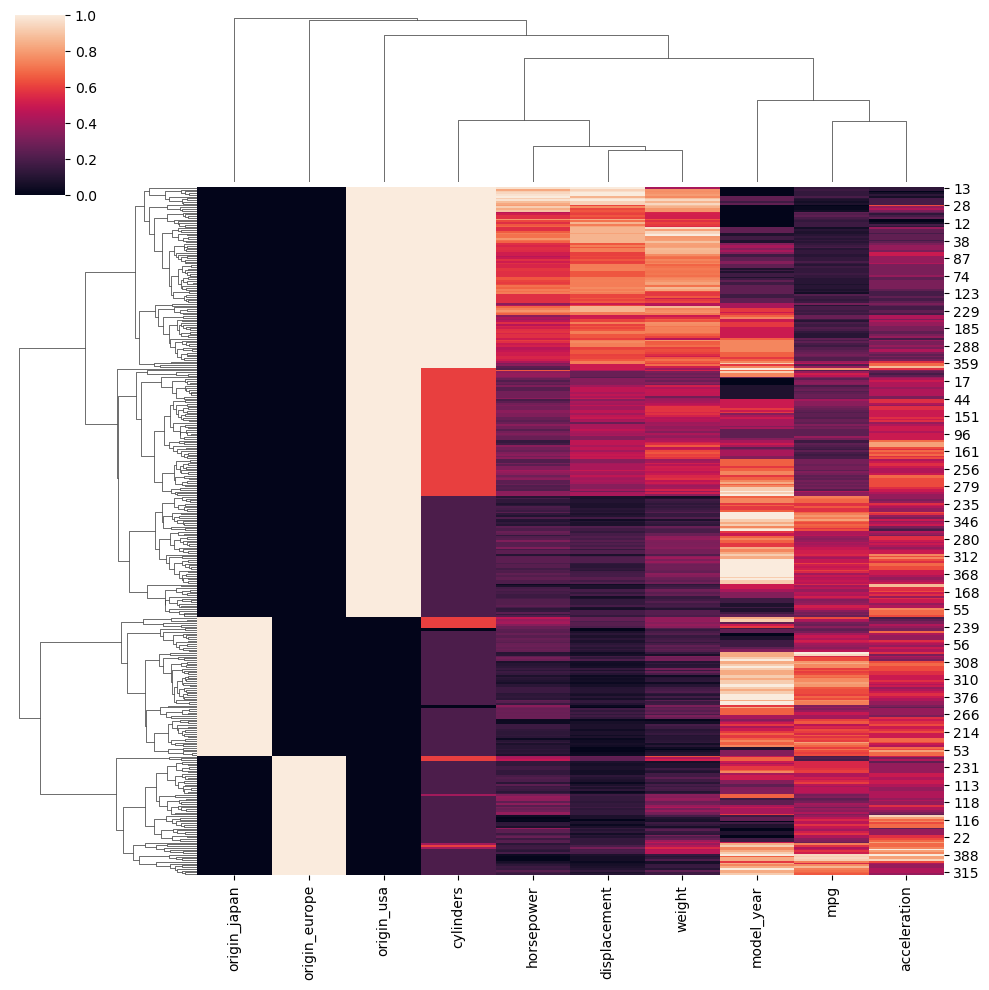

In [14]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df)

<Figure size 1500x800 with 0 Axes>

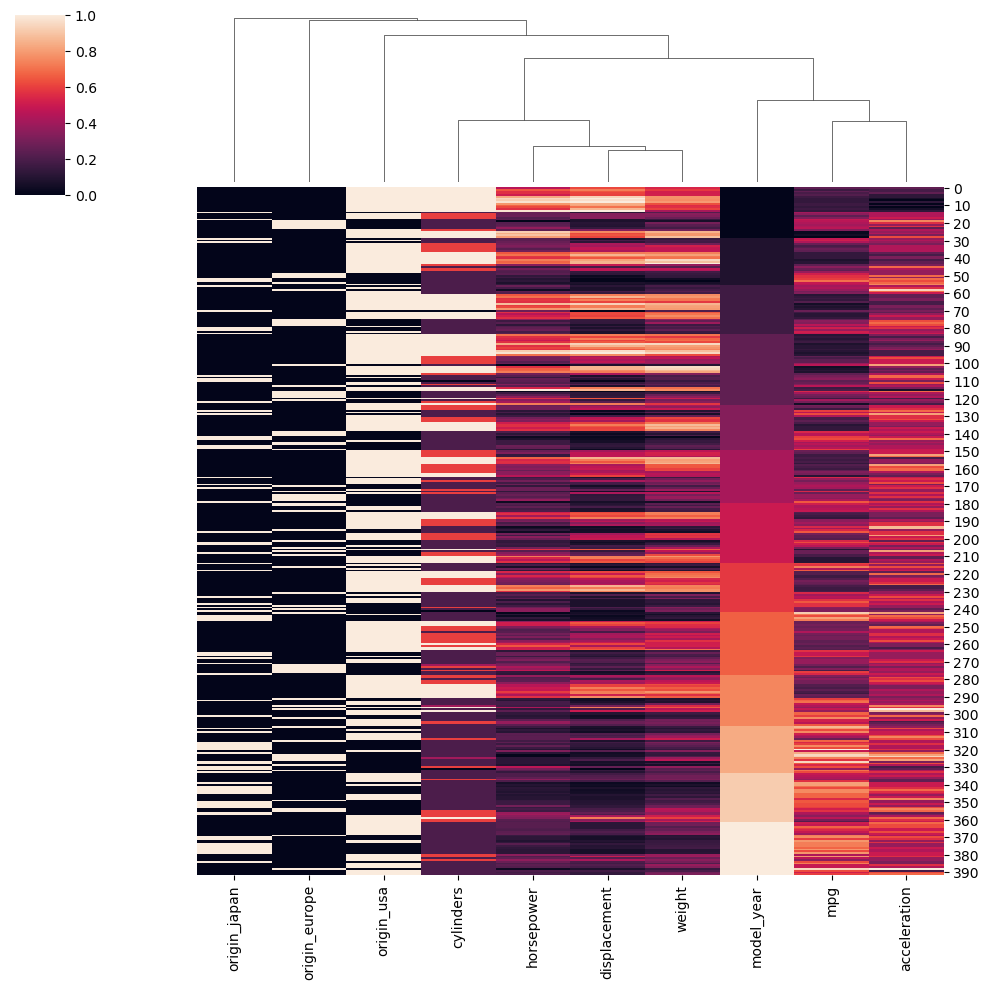

In [16]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df,row_cluster=False)

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
model = AgglomerativeClustering(n_clusters=4)

In [19]:
cluster_label = model.fit_predict(scaled_df)

In [20]:
cluster_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<Axes: xlabel='mpg', ylabel='weight'>

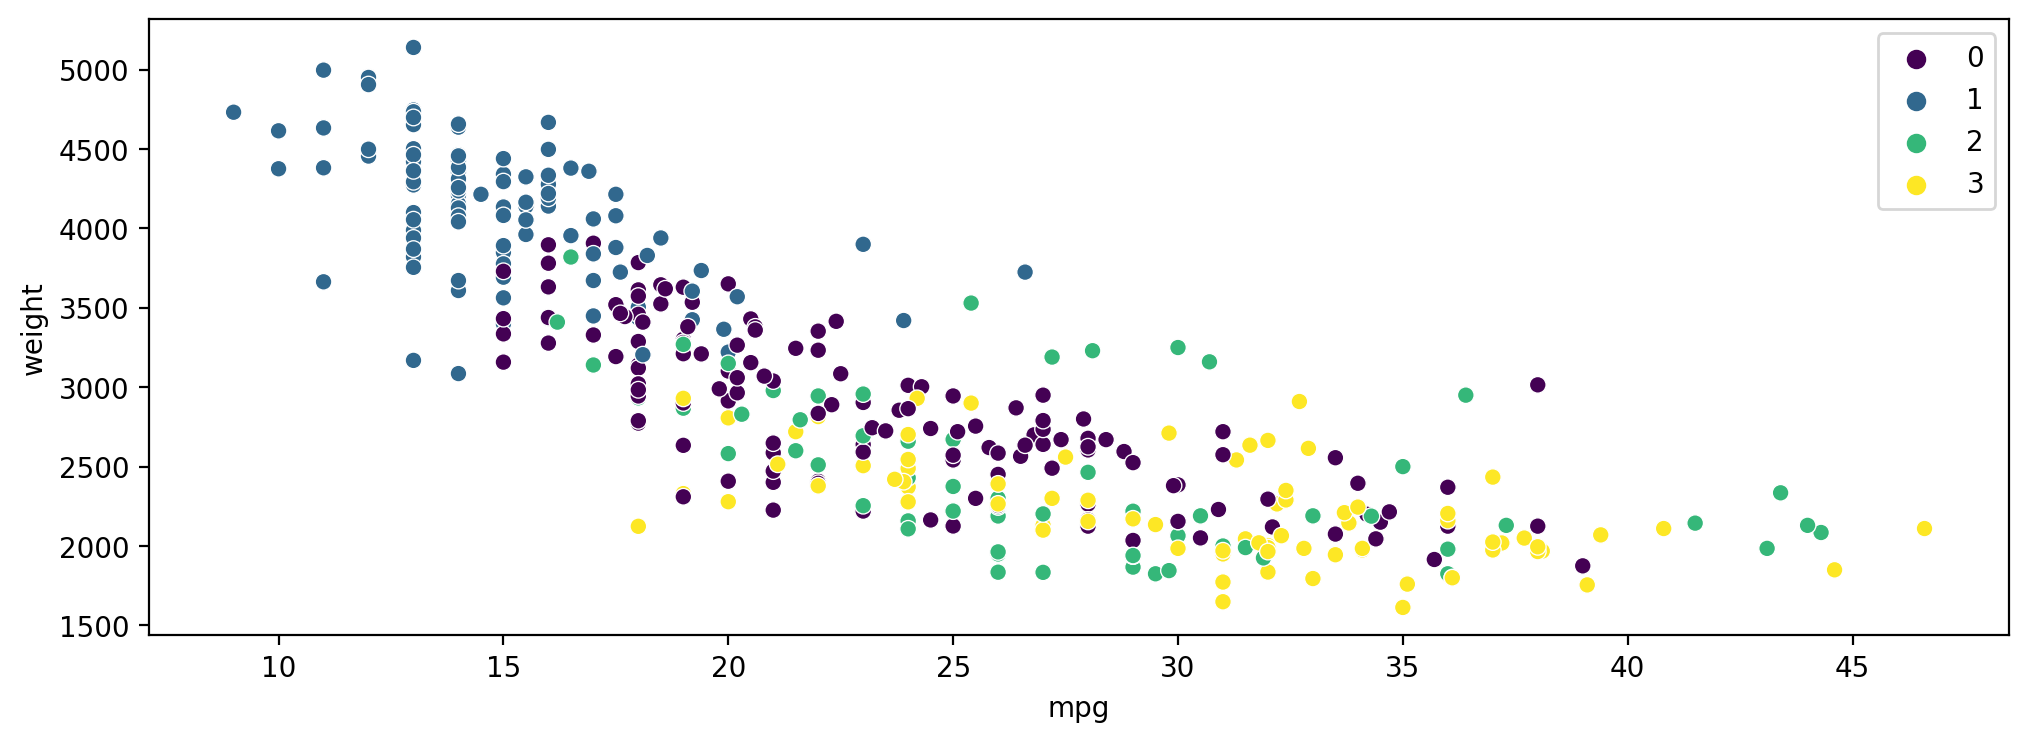

In [24]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='weight', hue=cluster_label, palette='viridis')

In [25]:
# to find our maximum distance possible 
# sqrt(n_features)

In [26]:
len(scaled_df.columns)

10

In [27]:
np.sqrt(10)

3.1622776601683795

In [28]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [29]:
cluster_label = model.fit_predict(scaled_df)

In [30]:
cluster_label

array([243, 282, 332, 201, 264, 377, 373, 263, 196, 273, 209, 374, 241,
       283, 223, 379, 269, 311, 300, 357, 320, 343, 335, 291, 387, 198,
       242, 212, 371, 356, 218, 262, 257, 301, 385, 358, 388, 336, 298,
       352, 309, 314, 302, 211, 236, 339, 288, 213, 277, 278, 265, 347,
       253, 202, 333, 391, 319, 232, 219, 258, 386, 204, 345, 186, 254,
       310, 248, 195, 381, 266, 289, 349, 317, 197, 244, 295, 215, 270,
       128, 226, 167, 200, 351, 341, 210, 178, 382, 321,  98, 126, 216,
       306, 274, 323, 220, 364, 384, 296, 318, 280, 260, 199, 361, 131,
       313, 247, 294, 380, 275, 221, 217, 246, 279, 287, 304, 375, 235,
       276, 227, 324, 281, 267, 331, 303, 259, 344, 312, 390, 165, 109,
       376, 322, 208, 285, 308, 297, 250, 329, 261, 129, 348, 193, 369,
       136,  99, 249, 156, 372,  97, 365, 185, 355, 132, 346, 268, 327,
       147, 315, 353, 334, 251, 237, 271, 137, 383, 342, 187, 326, 100,
       286, 138, 190, 171, 177, 229, 155, 337, 233, 158, 354, 35

In [31]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [32]:
linkage_matrix = hierarchy.linkage(model.children_)

In [33]:
linkage_matrix

array([[ 72.        , 159.        ,   1.41421356,   2.        ],
       [  4.        ,  43.        ,   1.41421356,   2.        ],
       [ 13.        , 158.        ,   1.41421356,   2.        ],
       ...,
       [776.        , 777.        ,  50.53711507, 389.        ],
       [346.        , 778.        ,  54.45181356, 390.        ],
       [332.        , 779.        ,  76.36753237, 391.        ]])

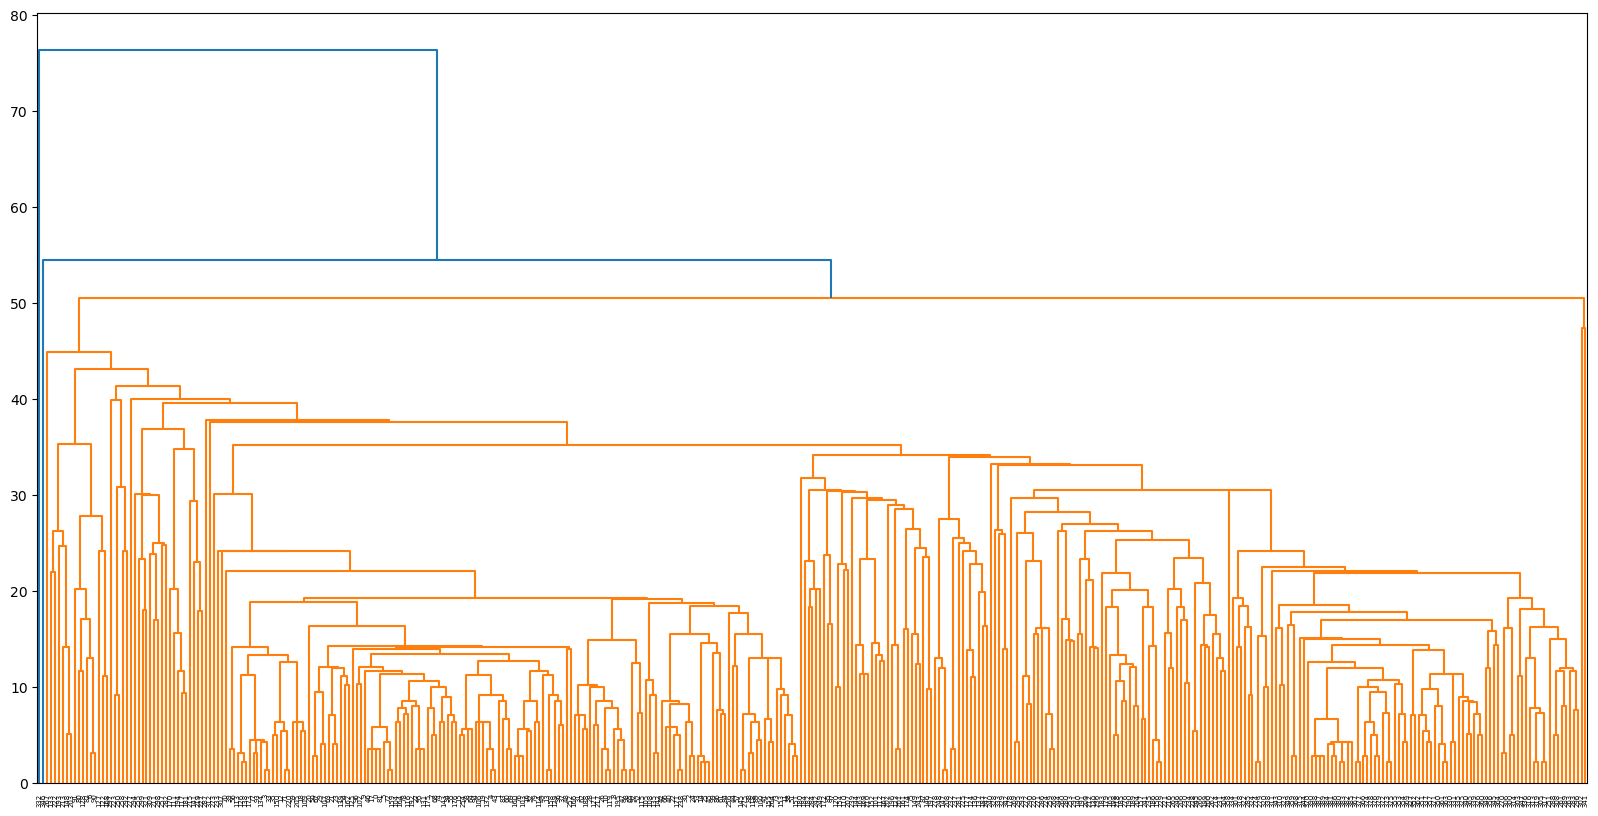

In [34]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix)

In [35]:
np.sqrt(len(scaled_df.columns))

3.1622776601683795

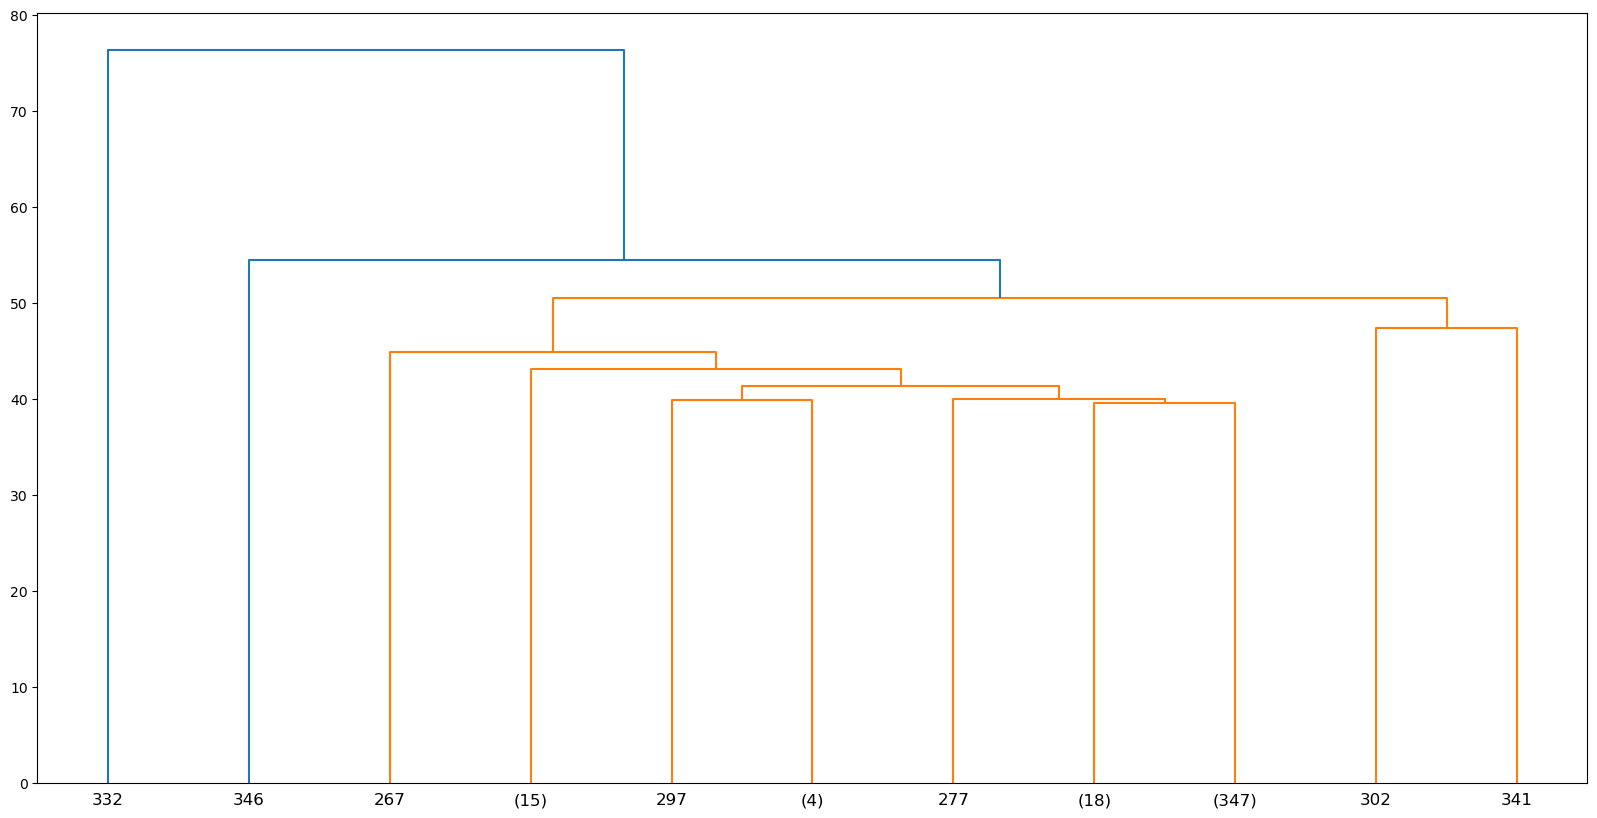

In [36]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=11)

In [40]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=2)

In [41]:
cluster_label = model.fit_predict(scaled_df)

In [42]:
cluster_label

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  9,  9,
        9,  3,  0,  0,  0,  0,  0,  9,  1,  1,  1,  1,  3,  8,  3,  9,  9,
        9,  9,  9,  1,  1,  1,  1,  1,  1,  1,  9,  8,  9,  9,  8,  0,  0,
        0,  3,  3,  0,  8,  3,  8,  0,  8,  8,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  0,  0,  0,  0,  8,  3,  3,  8,  3,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,  2,  9,  9,  9,  0,
        1,  1,  1,  1,  9,  3,  8,  3,  3,  8,  9,  0,  1,  1,  0,  0,  0,
        0,  1,  0, 10,  1,  9,  9,  2,  3,  8,  3,  8,  2,  2,  2,  1,  1,
        1,  1,  1,  0,  0,  0,  3,  3,  8,  0,  0,  3,  3,  0,  2,  2,  2,
        2,  5,  1,  1,  1,  2,  2,  2,  2,  9,  5,  5,  3,  8,  9,  8,  3,
        0,  3,  9,  0,  2,  0,  0,  0,  0,  3,  0,  0,  8,  4,  0,  5,  5,
        5,  5,  2,  2,  2,  2,  8,  8,  0,  3,  2,  2,  2,  2,  0,  3,  3,
        8,  0,  5,  7, 10,  0,  5,  5,  5,  5,  3,  4,  7,  8,  3,  5,  5,
        5,  5,  2,  2,  2

In [44]:
linkage_matrix = hierarchy.linkage(model.children_)

In [45]:
linkage_matrix

array([[ 72.        , 159.        ,   1.41421356,   2.        ],
       [  4.        ,  43.        ,   1.41421356,   2.        ],
       [ 13.        , 158.        ,   1.41421356,   2.        ],
       ...,
       [776.        , 777.        ,  50.53711507, 389.        ],
       [346.        , 778.        ,  54.45181356, 390.        ],
       [332.        , 779.        ,  76.36753237, 391.        ]])

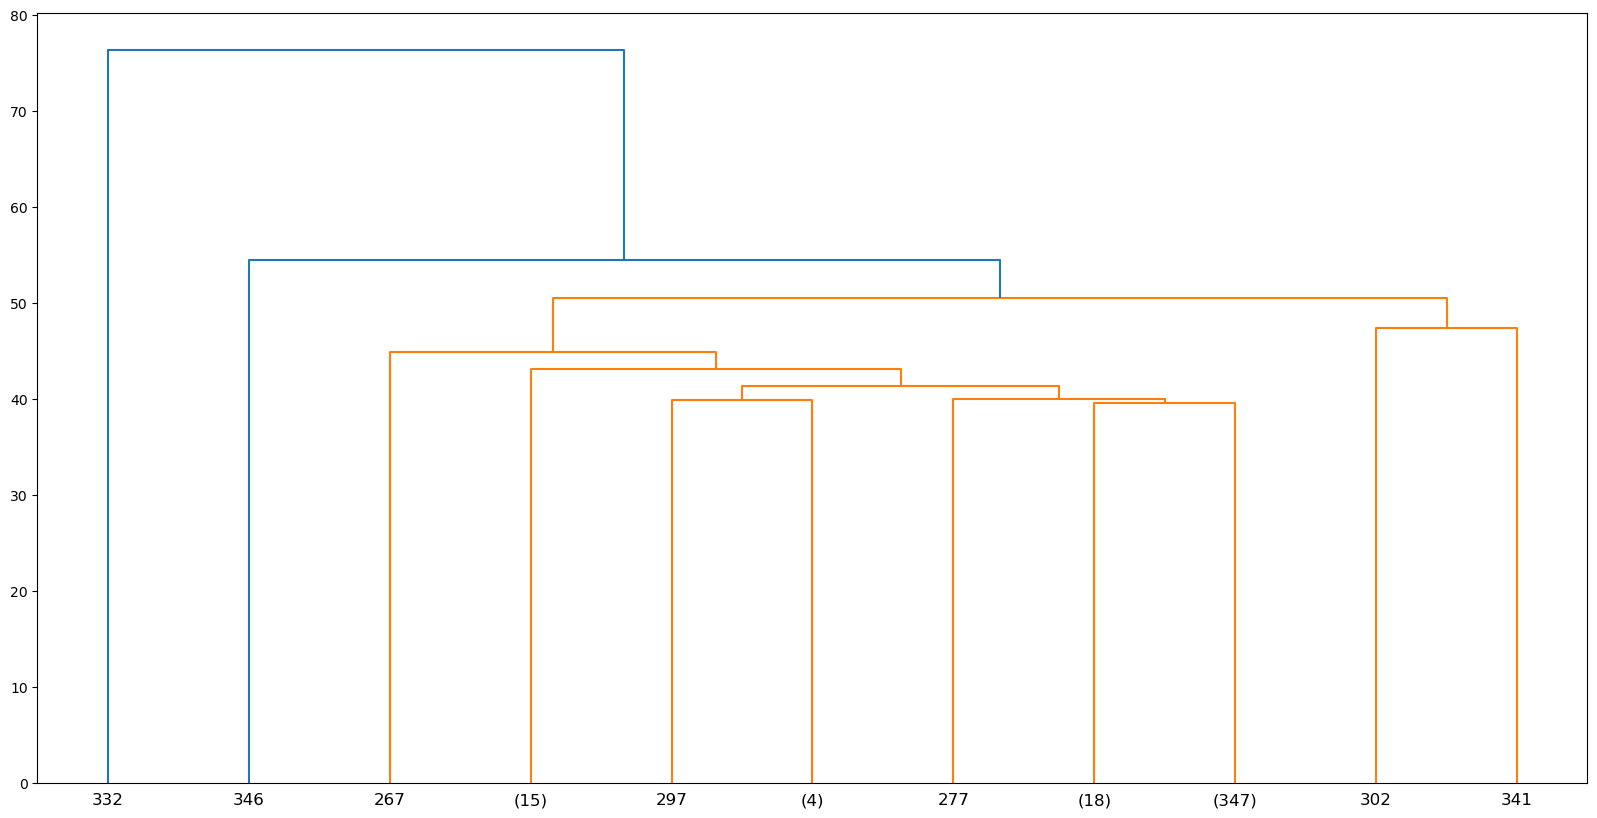

In [46]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=11)